In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from scipy.optimize import least_squares
%matplotlib inline

In [3]:
#data organization and editing

#0 = MPG
#1 = Cyclinders
#2 = Displacement
#3 = Horsepower
#4 = Weight
#5 = Acceleration
#6 = Model Year (70-82)
#7 = City of Origin (1,2,3)

def textFileParse(filename): #cuts out car maker (not going to evaluate) works
    data = []
    with open(filename) as text:
        tLines = text.readlines()
        for count, lineTxt in enumerate(tLines):
            term = lineTxt.split(maxsplit = 8)
            
            newLine = []
            if count == 0:
                for i in range(8):
                    newLine.append(float(term[i]))
                        
            else:
                for i in range(8):
                    newLine.append(float(term[i]))
            data.append(newLine)
                
        data = np.array(data, dtype = 'float64')

        return data
    
def splitYear(data, year): #works
    newData = []
    for i in range(398):
        dataRow = []
        if data[i,6] == year:
            for j in range(8):
                dataRow.append(data[i,j])
            newData.append(dataRow)
    newData = np.array(newData, dtype = 'float64')
    return newData

def splitCat(data,column):
    newData = data[:,column]
    return newData

def scaler(data): #potentially need to scale each column individually going to ask in class
    for i in range(6):
        scaler = StandardScaler()
        values = np.zeros((len(data[:,i]),1))
        values[:,0] = data[:,i]
        values = scaler.fit_transform(values)
        data[:,i] = values [:,0]
    return data

In [4]:
#PLSR
def func_PLSR(data): #needs the data to be scaled before hand (makes it easier to do cross validation)
    PLSR = PLSRegression(n_components = 2)
    PLSR.fit(data[:,1:6],data[:,0])
    print('The R2Y value is', PLSR.score(data[:,1:6],data[:,0]))
    Xscores = PLSR.x_scores_
    Yscores = PLSR.y_scores_
    Xload = PLSR.x_loadings_
    Yload = PLSR.y_loadings_
    plt.figure()
    plt.scatter(Xscores[:,0],Xscores[:,1])
    plt.scatter(Yscores[:,0],Yscores[:,1])
    plt.title('Scores Plot')
    plt.figure()
    plt.scatter(Xload[0,0],Xload[0,1],label = 'Cylinders')
    plt.scatter(Xload[1,0],Xload[1,1],label = 'Displacement')
    plt.scatter(Xload[2,0],Xload[2,1],label = 'Horsepower')
    plt.scatter(Xload[3,0],Xload[3,1],label = 'Weight')
    plt.scatter(Xload[4,0],Xload[4,1],label = 'Acceleration')
    plt.scatter(Yload[:,0],Yload[:,1], label = 'MPG')
    plt.title('Loadings Plot')
    plt.legend(loc = 'best');

In [16]:
#Least Squares
def residuals_ind(values,data,column, order):
    if order == 1:
        beta,offset = values
    elif order == 2:
        beta1,beta2,offset = values
    predVal = []
    for i in range(len(x[:,0])):
        if order == 1:
            prediction = (beta*data[i,column]) + offset
        elif order == 2:
            prediction = (beta1*(data[i,column]**2)) + (beta2*data[i,column]) + offset
        predVal.append(prediction)
    predVal = np.array(predVal)
    residuals = predVal - data[:,0]
    return residuals

def residuals_full(values,data):
    beta1,beta2,beta3,beta4,beta5,offset = values
    predVal = []
    for i in range(len(x[:,0])):
        prediction = (beta1*data[i,1]) + (beta2*data[i,2]) + (beta3*data[i,3]) + (beta4*data[i,4]) + (beta5*data[i,5]) + offset
        predVal.append(prediction)
    predVal = np.array(predVal)
    residuals = predVal - data[:,0]
    return residuals

def OLS_ind(data,column,order):
    if order == 1:
        y0 = np.zeros(2)
    elif order == 2:
        y0 = np.zeros(3)
    data = scaler(data)
    opt = least_squares(residuals_ind, y0, args = (data,column,order))
    return opt.x

def OLS_full(data):
    y0 = np.zeros(6)
    data = scaler(data)
    opt = least_squares(residuals_full,y0,args = (data,))
    return opt.x

In [12]:
#results analysis
def R2YCalc_ind(values,data,column,order):
    residuals = residuals_ind(values,data,column,order)
    for i in range(len(residuals)):
        residuals[i] = residuals[i]**2
    r2y = 1 - np.sum(residuals)
    return r2y

def R2YCalc_full(values,data):
    residuals = residuals_full(values,data)
    for i in range(len(residuals)):
        residuals[i] = residuals[i]**2
    r2y = 1 - np.sum(residuals)
    return r2y

def dataPlot_ind(values,data,column,order):
    plt.figure()
    plt.scatter(data[:,column],data[:,0])
    plt.title('Measured Data')
    
    if order == 1:
        beta,offset = values
    elif order == 2:
        beta1,beta2,offset = values
    predVal = []
    for i in range(len(data[:,0])):
        if order == 1:
            prediction = (beta*data[i,column]) + offset
        elif order == 2:
            prediction = (beta1*(data[i,column]**2)) + (beta2*data[i,column]) + offset
        predVal.append(prediction)
    predVal = np.array(predVal)
    
    plt.figure()
    plt.scatter(data[:,column],predVal)
    plt.title('Predicted Data')

In [7]:
#Plotting OLS vs Measured

In [8]:
x = textFileParse("auto-mpg.data.txt") #this function works

[ 0.08880594 -0.8220135  -0.08880594]
-156.60819623933077


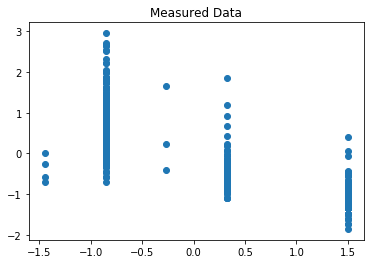

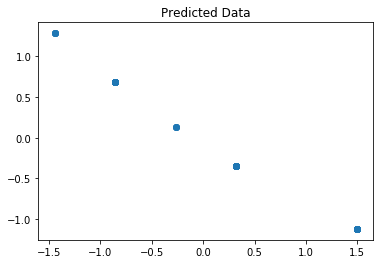

In [22]:
values = OLS_ind(x,1,2)
print(values)
value = R2YCalc_ind(values,x,1,2)
print(value)
dataPlot_ind(values,x,1,2)

[ 0.23829272 -0.97504205 -0.23829272]
-123.0146066969984


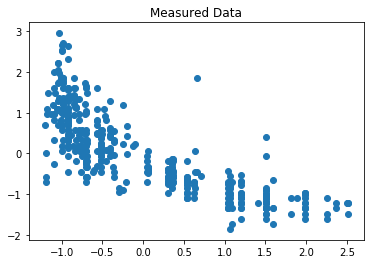

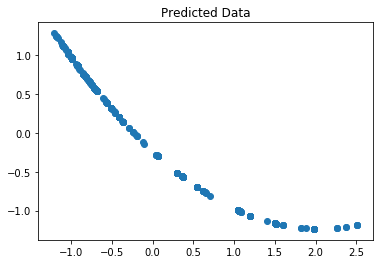

In [17]:
values = OLS_ind(x,2,2)
print(values)
value = R2YCalc_ind(values,x,2,2)
print(value)
dataPlot_ind(values,x,2,2)

[ 0.23209865 -1.03027113 -0.23209865]
-123.20439417678887


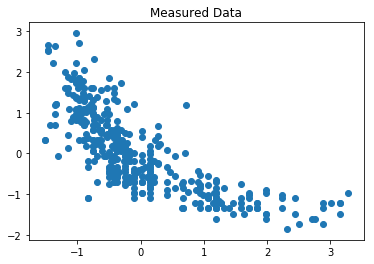

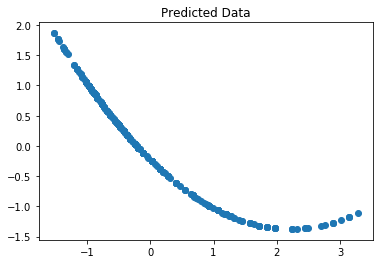

In [18]:
values = OLS_ind(x,3,2)
print(values)
value = R2YCalc_ind(values,x,3,2)
print(value)
dataPlot_ind(values,x,3,2)

[ 0.15729871 -0.91496122 -0.15729871]
-112.5143259207681


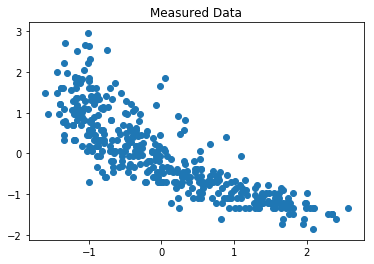

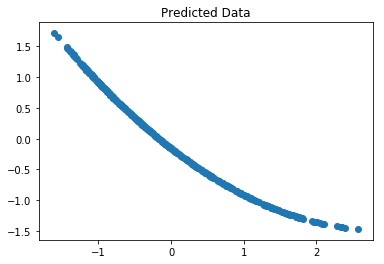

In [21]:
values = OLS_ind(x,4,2)
print(values)
value = R2YCalc_ind(values,x,4,2)
print(value)
dataPlot_ind(values,x,4,2)

[-0.08315361  0.44338275  0.08315361]
-320.3058693082296


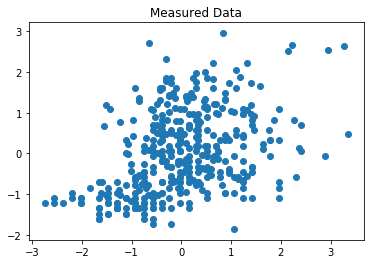

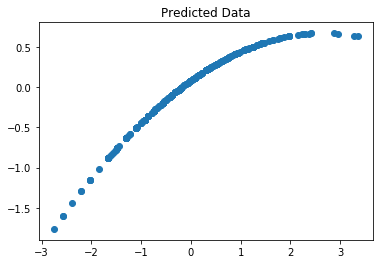

In [19]:
values = OLS_ind(x,5,2)
print(values)
value = R2YCalc_ind(values,x,5,2)
print(value)
dataPlot_ind(values,x,5,2)

The R2Y value is 0.6970374007227929


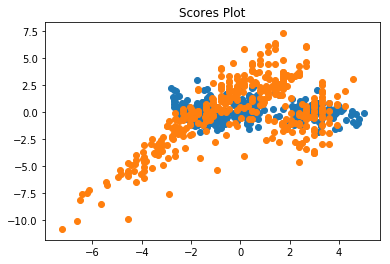

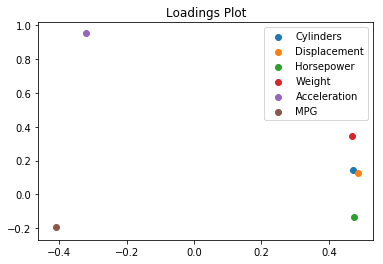

In [20]:
x = scaler(x)
func_PLSR(x)